<a href="https://colab.research.google.com/github/shintafiaa/TeachingAssisting-ML/blob/main/K_Means_Clustering_on_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exploratory Data Analysis

In [2]:
import pandas as pd

# Path file dataset di Google Drive
file_path = '/content/drive/MyDrive/Dataset/Mall_Customers.csv'

# Membaca dataset sebagai DataFrame
df = pd.read_csv(file_path)

# Menampilkan informasi atau contoh data dari DataFrame
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#Preprocessing

Drop kolom CustomerID

In [4]:
# Menghapus fitur CustomerID
df.drop(columns=['CustomerID'], inplace=True)

# Menampilkan informasi setelah penghapusan
print("\nInformasi setelah penghapusan:")
df.info()



Informasi setelah penghapusan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
# Mengubah nama kolom Genre menjadi Gender
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Menampilkan informasi setelah perubahan
print("\nInformasi setelah perubahan:")
print(df.head())


Informasi setelah perubahan:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [7]:
# Konversi variabel kategorikal 'Gender' menjadi numerik
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


#Modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

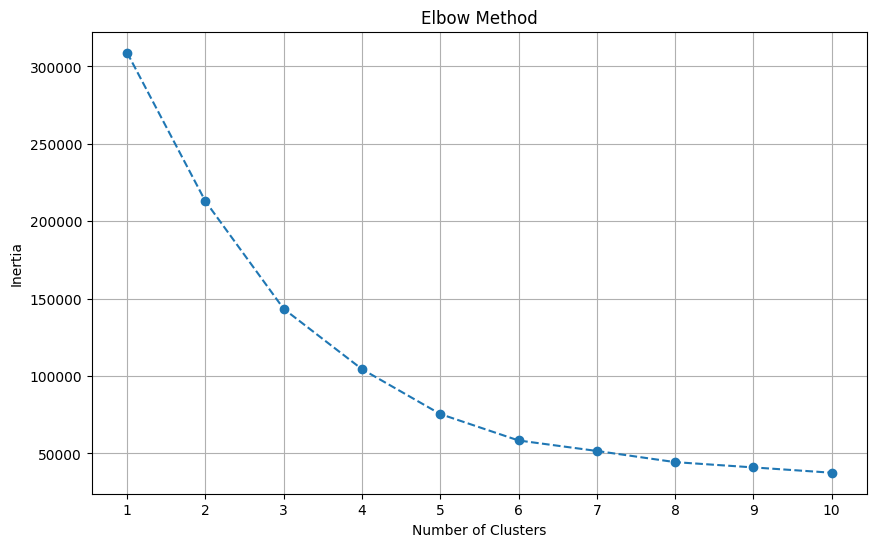

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menghitung inertia untuk berbagai jumlah cluster
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot siku (elbow method)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [30]:
# Melatih model K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)

# Menambahkan label klaster ke DataFrame
df['Cluster'] = kmeans.labels_

# Menampilkan hasil klaster
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,4
2,1,20,16,6,2
3,1,23,16,77,4
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,0
196,1,45,126,28,3
197,0,32,126,74,0
198,0,32,137,18,3


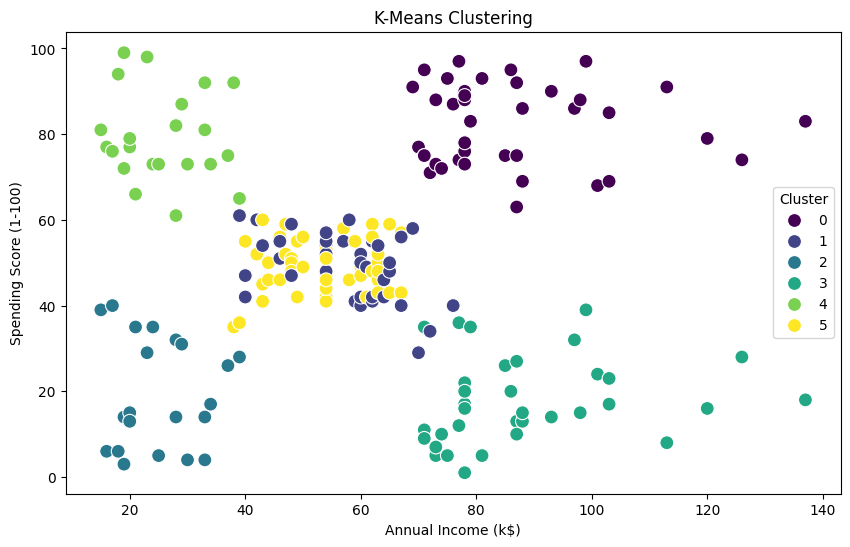

In [31]:
import seaborn as sns

# Visualisasi hasil klasterisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

#Evaluating

In [32]:
from sklearn.metrics import silhouette_score

# Evaluasi K-Means menggunakan Inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Evaluasi K-Means menggunakan Silhouette Score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Inertia: 58633.342346542355
Silhouette Score: 0.45464484116975806
